#  CAR SALES IN UKRAINE IN 2016

<img src="https://lbrcontent.affino.com/AcuCustom/Sitename/DAM/010/Ukraine.jpg" width="1240" height="1160"><br/>


## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis Based on Cars**](#section501)<br>
    - 5.1.1 [Which are more sold in Ukraine?](#section50101)<br>
    - 5.1.2 [Which type of car's body is more choosen in Ukraine?](#section50102)<br>
    - 5.1.3 [ Which type of engine is more choosen in Ukraine?](#section50103)<br>
    - 5.1.4 [ Number of cars sold in year on bases of  drive?](#section50104)<br>
  - 5.2 [**Analysis based on top cars sold**](#section502)<br>
      - 5.2.1 [Which is the most common engine on top cars sold?](#section50201)<br>
      - 5.2.2 [Type of Engine Cars](#section50202)<br>
      - 5.2.3 [Cars sold in year](#section50203)<br>
      - 5.2.4 [ On an average, how much mileage is given by top sold cars](#section50204)<br>
  - 5.3 [**Analysis on Luxury Cars**](#section503)<br>
    - 5.3.1 [Car Manufacture Brand](#section50301)<br>
    - 5.3.2 [Luxury Cars Sales](#section50302)<br>
6. [Conclusion and Insights](#section6)<br>
  - 6.1 [**Conclusion**](#section601)<br>
  - 6.2 [**Insights**](#section602)<br>


## 1. Problem Statement

Based on **Cars**, **how can Car sales can be increased in ****developing country like Ukraine** near **future**?



<a id=section2></a>
## 2. Importing Packages

In [6]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)     
pd.set_option('display.max_colwidth', -1)          
pd.options.display.max_columns = 50               

import warnings
warnings.filterwarnings('ignore') 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)  
import pandas_profiling

<a id=section3></a>
## 3. Loading Data

**CAR SALES** dataset of UKRAINE in 2016. 

<img src="https://www.kyivpost.com/wp-content/uploads/data/uploads/e/iblock/en_articles/124517/6886/original.jpg" width=750 height=750><br/>

- **Car Sales Dataset**: This dataset gives the information about **Car Sales of UKRAINE in 2016**.

### Importing 1st Dataset

In [7]:
Car_sales = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",encoding='latin')
Car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


<a id=section301></a>
### Description of the Dataset

- This dataset provides information on Car Sales of different cars which are from Ukraine. 


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| car                       | manufacturer brand .                                                   | 
| price                           | seller’s price in advertisement (in USD)Name of the item.                                                                          | 
| body                     | car body type .                                                        | 
| mileage                         | as mentioned in advertisement (‘000 Km).                                                     |
| engV                        |rounded engine volume (‘000 cubic cm).                                                                   |
| engType                      | type of fuel (“Other” in this case should be treated as NA) .                                                                 |
| registration                  |whether car registered in Ukraine or not.                                                             |
| year                      | year of production.                                                                 |
| model                     | Specific model name.                                                               |
| drive                  | Drive type .                                                             |
                                                                 |



<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [3]:
profile=pandas_profiling.ProfileReport(Car_sales)
profile.to_file(output_file='Car_sales.html')

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

In [8]:
Car_sales.drop_duplicates(inplace=True)
Car_sales.reset_index(inplace=True)#reseting index
Car_sales.head()

,index,car,price,body,mileage,engV,engType,registration,year,model,drive
0,0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


- **Changing NAN values to meadian of car based on car manufacture brand**

In [9]:
CarengV = Car_sales[Car_sales["engV"].isnull()]["car"].unique()
medofenvbycar=Car_sales.groupby(["car"])["engV"].median().loc[list(CarengV)]
for i in Car_sales[Car_sales["engV"].isnull()][["car","engV"]].index.astype('int'):
    if (Car_sales.iloc[i].car) in (list(medofenvbycar.index)):
        Car_sales.iloc[i,5]=medofenvbycar.loc[Car_sales.iloc[i].car]

In [10]:
Car_sales.drop(index=Car_sales[Car_sales['engV'].isnull()].index,inplace=True)
Car_sales.reset_index(inplace=True)
Car_sales.head()

,level_0,index,car,price,body,mileage,engV,engType,registration,year,model,drive
0,0,0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,1,1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,2,2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,3,3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,4,4,Mercedes-Benz,33000.0,vagon,91,2.7,Other,yes,2013,E-Class,NaN


- **Changing Zero's in Price column to mean of the car's price based on Car Manufacture Brand**

In [11]:
PriceZeroCar=Car_sales[Car_sales["price"] ==0.0]["car"].unique()
MeanOfPriceByCar=Car_sales.groupby(["car"])["price"].mean().loc[list(PriceZeroCar)]
for i in Car_sales[Car_sales["price"] ==0.0][["car","price"]].index.astype('int'):
    if (Car_sales.iloc[i].car) in (list(MeanOfPriceByCar.index)):
        Car_sales.iloc[i,3]=MeanOfPriceByCar.loc[Car_sales.iloc[i].car]

In [12]:
Car_sales["price"].round(3)
Car_sales.drop(["level_0","index"],axis=1,inplace=True)
Car_sales.reset_index(inplace=True)
Car_sales.head()

,index,car,price,body,mileage,engV,engType,registration,year,model,drive
0,0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,4,Mercedes-Benz,33000.0,vagon,91,2.7,Other,yes,2013,E-Class,NaN


- **Changing NAN values in drive column to mode of car based on Car Manufacture Brand**

In [13]:
ModeOfdrive=Car_sales.groupby(["car"]).drive.apply(lambda x:x.mode())
ModeOfdrive.head()
ModeOfdrive.columns=["drive"]
ModeOfdrive.reset_index(level=1,drop=True,inplace=True)
ModeOfdrive = ModeOfdrive.loc[~ModeOfdrive.index.duplicated(keep='first')]
for i in Car_sales[Car_sales["drive"].isnull()][["car","drive"]].index.astype('int'):
    if (Car_sales.iloc[i].car) in (list(ModeOfdrive.index)):
        Car_sales.iloc[i,10]=ModeOfdrive.loc[Car_sales.iloc[i].car]

In [14]:
Car_sales.drop(index=Car_sales[Car_sales["car"]=="Other-Retro"]["car"].index,inplace=True) 
Car_sales.reset_index(inplace=True)
Car_sales.drop(["level_0","index"],axis=1,inplace=True)

- **Changing Zero's in mileage column to mean of car based on Car Manufacture Brand**

In [11]:
MileageOfCarzero = Car_sales[Car_sales["mileage"] ==0.0]["car"].unique()
MeanOfmileagecar = Car_sales.groupby(["car"])["mileage"].mean().loc[list(MileageOfCarzero)]
for i in Car_sales[Car_sales["mileage"] ==0.0][["car","mileage"]].index.astype('int'):
    if (Car_sales.iloc[i].car) in (list(MeanOfmileagecar.index)):
        Car_sales.iloc[i,3]=MeanOfmileagecar.loc[Car_sales.iloc[i].car]

- **Changing Other in engType column to mode of car based on Car Manufacture Brand**

In [15]:
ModeOfEngType=Car_sales.groupby(["car"]).engType.apply(lambda x:x.mode())
ModeOfEngType.reset_index(level=1,drop=True,inplace=True)
ModeOfEngType = ModeOfEngType.loc[~ModeOfEngType.index.duplicated(keep='first')]
for i in Car_sales[Car_sales["engType"].isin(["Other"])][["car","engType"]].index.astype('int'):
    if (Car_sales.iloc[i].car) in (list(ModeOfEngType.index)):
        Car_sales.iloc[i,5]=ModeOfEngType.loc[Car_sales.iloc[i].car]


In [16]:
Car_sales["engType"].replace(to_replace="Other",value=Car_sales["engType"].mode()[0],inplace=True)

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

In [14]:
postprofile=pandas_profiling.ProfileReport(Car_sales)
postprofile.to_file(output_file='Car_sales_post_profiling.html')

<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section501></a>
## 5.1 Analysis Based on Cars

<img src="https://images.wsj.net/im-27508?width=620&size=1.5" width=750 height=750><br/>

<a id=section50101></a>
### 5.1.1 Which are more sold in Ukraine?

Text(0.5, 1.0, 'The Number of cars of each Manufacture Brand')

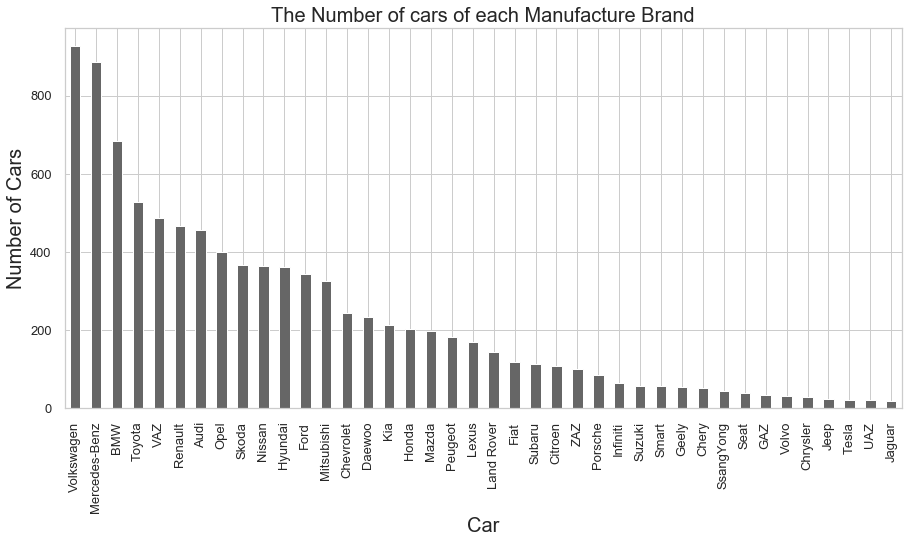

In [17]:
Car_sales["car"].value_counts().head(40).plot.bar(figsize=(15,7), colormap='Dark2_r', fontsize=13)
plt.xlabel('Car',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('The Number of cars of each Manufacture Brand',fontsize=20)

- **Volkswagen and Mercedes-benz, BMW and toyota and VAZ are more sold cars**

<a id=section50102></a>
### 5.1.2 Which type of car's body is more choosen in Ukraine?

Text(0.5, 1.0, 'Body vs Number of cars')

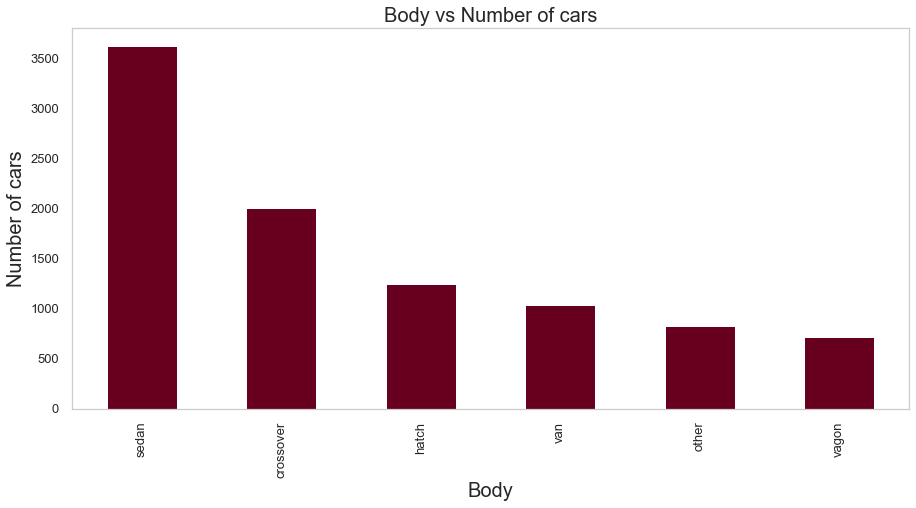

In [18]:
Car_sales["body"].value_counts().plot.bar(figsize=(15,7), colormap='RdBu', fontsize=13,grid=False)
plt.xlabel('Body',fontsize=20)
plt.ylabel('Number of cars',fontsize=20)
plt.title('Body vs Number of cars',fontsize=20)

- **Sedan** cars are most used cars

<a id=section50103></a>
### 5.1.3 Which type of engine is more choosen in Ukraine?

Text(0.5, 1.0, 'Cars sold based on Engine type')

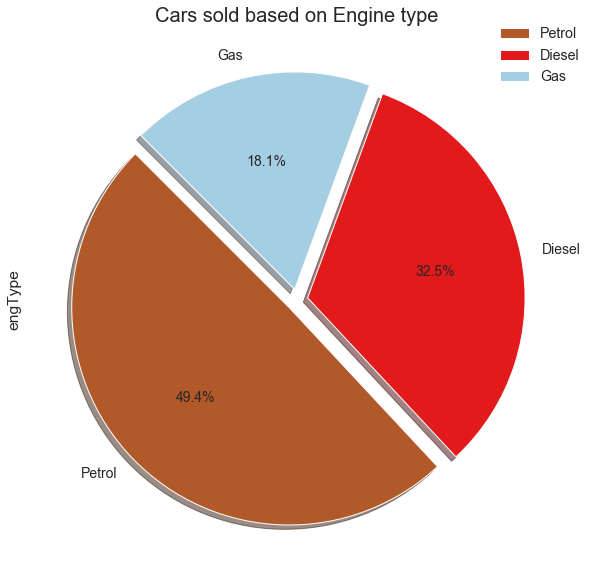

In [38]:
Car_sales["engType"].value_counts().plot(kind='pie',explode=[0.05,0.05,0.05],fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='Paired_r')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.title('Cars sold based on Engine type',fontsize=20)

- **Petrol** engines are more choosen
- **40% are petrol cars** and **32% are diesel cars** 

<a id=section50103></a>
### 5.1.3 Number of cars sold in year on bases of engine type?

Text(0.5, 1.0, 'Engine Type vs Year')

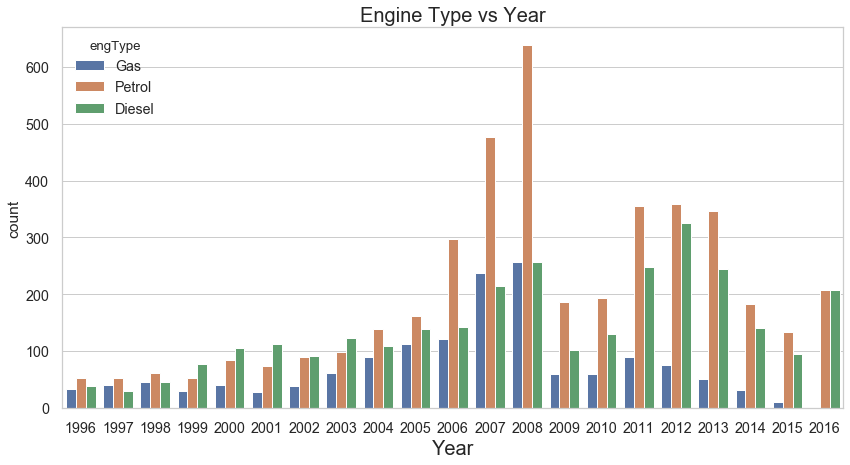

In [20]:
plt.figure(figsize=(14,7))
sns.countplot(data=Car_sales[Car_sales["year"] >= 1996],x="year",hue="engType")
plt.xlabel('Year',fontsize=20)
plt.title('Engine Type vs Year',fontsize=20)

- **2008** highest number of cars are been sold
- **2008** there are more petrol cars but in **2016** petrol and diesel cars are equal

<a id=section50104></a>
### 5.1.4 Number of cars sold in year on bases of  drive?

Text(0.5, 1.0, 'Based on Drive Type')

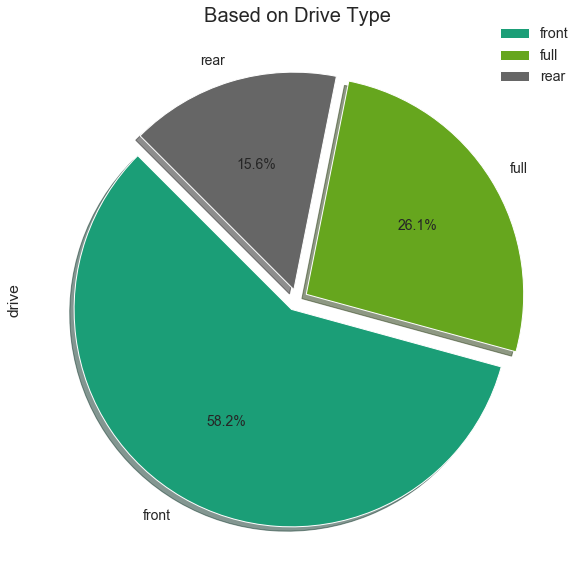

In [37]:
Car_sales["drive"].value_counts().plot(kind='pie',explode=[0.05,0.05,0.05],fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='Dark2')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.title('Based on Drive Type',fontsize=20)

- **58% are front drive cars which gives more mileage**

<a id=section502></a>
## 5.2 Analysis Based on top cars sold

<a id=section50201></a>
### 5.2.1 Which is the most common engine on top cars sold?


<img src="https://pictures.dealer.com/v/volkswagenofmaconvw/0283/968fc82d90d0aeb0e31d6b247f83be56x.jpg?impolicy=downsize&w=568" width=750 height=750><br/>

In [22]:
df1=Car_sales[Car_sales["car"].isin(["Mercedes-Benz","BMW","Volkswagen","Toyota","VAZ"])]


Text(0.5, 1.0, 'Engine type of cars which are having top sales')

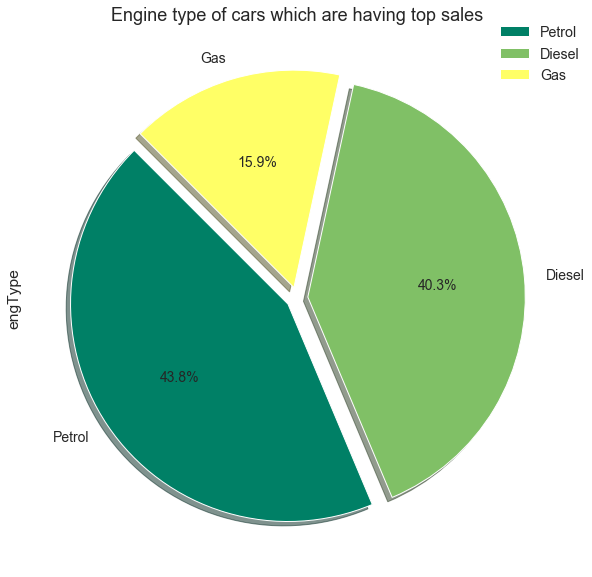

In [36]:
df1["engType"].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05],fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")


plt.title('Engine type of cars which are having top sales',fontsize=18)

- **Petrol cars** have more sales than Diesel or Gas cars 

<a id=section50202></a>
### 5.2.2 Type of Engine Cars

Text(0.5, 1.0, 'Year vs engine type')

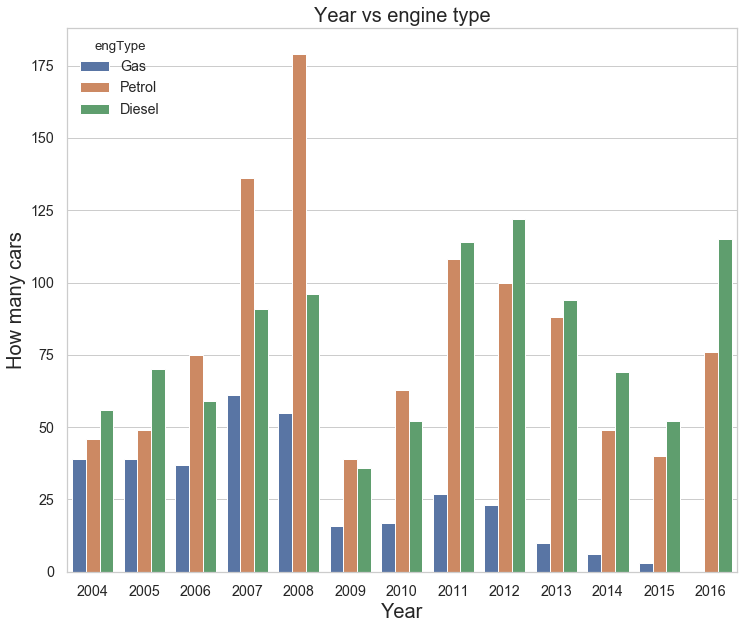

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(data=df1[df1["year"] >=2004],x="year",hue="engType")
plt.xlabel('Year',fontsize=20)
plt.ylabel('How many cars',fontsize=20)
plt.title('Year vs engine type' ,fontsize=20)

- Till **2009** Petrol cars has more sales , later on **Diesel cars** over crossed Petrol car sales but in **2010** Both Diesel and Petrol cars have same number of sales in TOP cars sold.
- Gas cars are being depreciated in Ukraine

<a id=section50203></a>
### 5.2.3 Cars sold in year

Text(0.5, 1.0, 'Trend of car sales of top 5 sold cars')

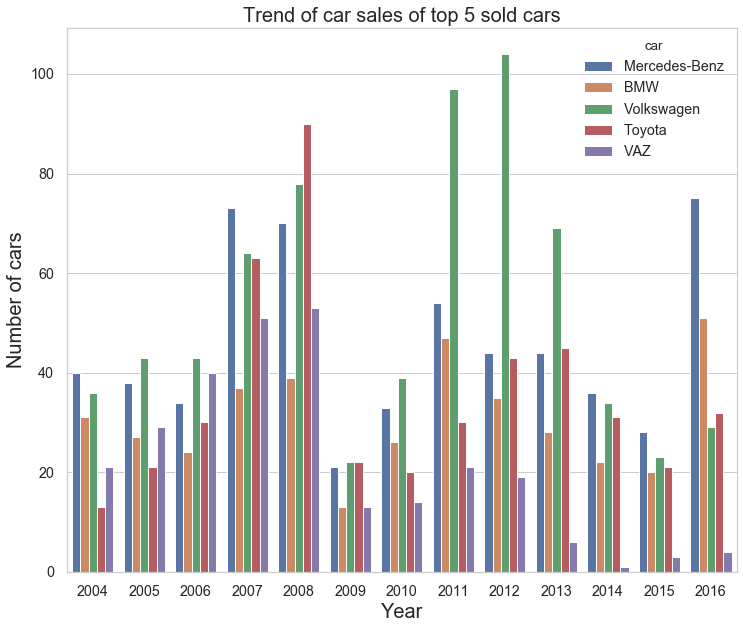

In [39]:
plt.figure(figsize=(12,10))
sns.countplot(data=df1[df1["year"] >=2004],x="year",hue="car")
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of cars',fontsize=20)
plt.title('Trend of car sales of top 5 sold cars',fontsize=20)

- **Mercedes** have decent sales and it has sales in **2014,2015,2016** 
- **Volkswagen** sales are high in year 2011,2012 and there is a drop in sales in last three years
- **BMW** sales are fluctuating but in 2016 it has highest sales over last 12 years
- After 2008 **VAZ** sales are decreasing and in **2014** it has lowest record of lowest sales

<a id=section50204></a>
### 5.2.4 On an average, how much mileage is given by top sold cars

Text(0.5, 1.0, 'mileage is given by top sold cars')

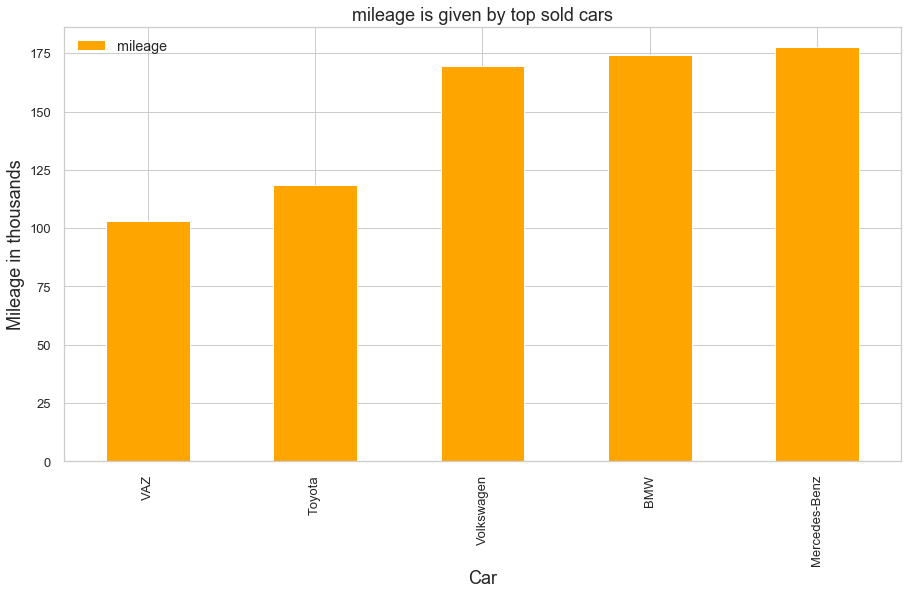

In [40]:
df1.groupby(['car'])['mileage'].mean().sort_values().plot(kind='bar', figsize=(15,8), fontsize=13, color='Orange',legend=True)
plt.ylabel('mileage')

plt.xlabel("Car",fontsize=18)
plt.ylabel('Mileage in thousands',fontsize=18)
plt.title('mileage is given by top sold cars',fontsize=18)

- **Mercedes** gives more milege in all four and **BMW , Volkswagen** are very near to mercedes

<a id=section503></a>
## 5.3 Analysis on Luxury Cars

<img src="https://o.aolcdn.com/images/dims3/GLOB/crop/2400x1350+0+0/resize/800x450!/format/jpg/quality/85/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2018-10/04560e80-d0ca-11e8-ba55-4b5b69b6a0bc" width=750 height=750><br/>

<a id=section50301></a>
### 5.3.1 Car Manufacture Brand

In [27]:
luxury_cars = Car_sales[Car_sales["price"] > 150000]
luxury_cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
38,Mercedes-Benz,200000.0,van,19,3.5,Petrol,yes,2013,Sprinter 324 ïàññ.,rear
64,Toyota,195000.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
230,Tesla,159600.0,sedan,0,0.7,Petrol,yes,2016,Model S,full
411,Tesla,159600.0,sedan,7,0.7,Petrol,yes,2016,Model S,rear
438,Land Rover,169900.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full


Text(0.5, 1.0, 'Luxury Cars')

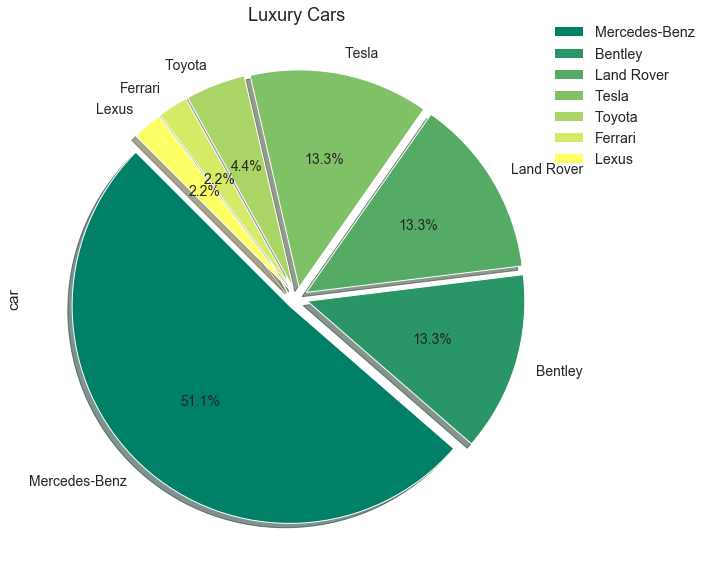

In [28]:
luxury_cars["car"].value_counts().plot(kind='pie',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05],fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.legend(bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.title('Luxury Cars',fontsize=18)

- **Mercedes** has **50%** sales in Luxury cars and we see that Mercedes gives more mileage among the luxuryy cars as well in [**section 5.2.4**](#section50204)<br>

<a id=section50302></a>
### 5.3.2 Luxury Cars Sales


Text(0.5, 1.0, 'luxury cars sales')

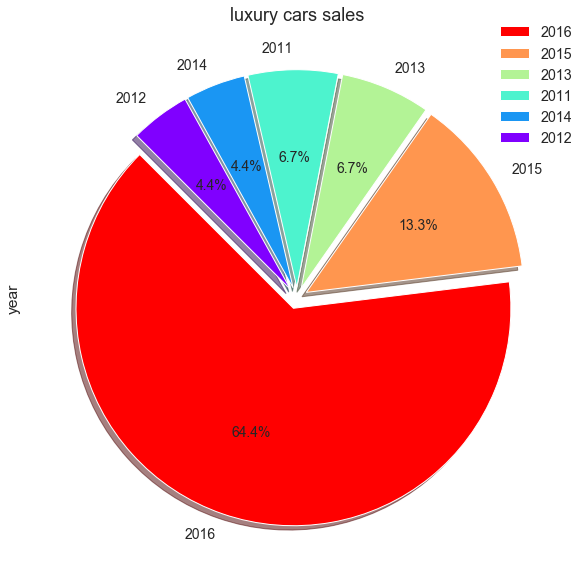

In [32]:
luxury_cars["year"].value_counts().plot(kind='pie',explode=[0.05,0.05,0.05,0.05,0.05,0.05],fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='rainbow_r')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.title('luxury cars sales',fontsize=18)

Text(0.5, 1.0, 'luxury cars sales')

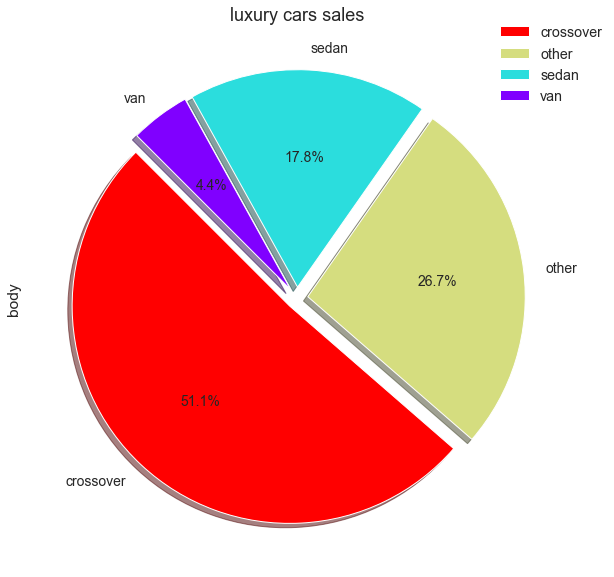

In [35]:
luxury_cars["body"].value_counts().plot(kind='pie',explode=[0.05,0.05,0.05,0.05],fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='rainbow_r')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.title('luxury cars sales',fontsize=18)

- Sales of luxury cars started in the year **2011**. In **2016** sales are very high , More than 50% sales of luxury cars are in **2016**

<a id=section6></a>
## 6. Conclusion and Insights




<a id=section601></a>
## 6.1 Conclusion

- **Volkswagen , Mercedes-Benz, BMW, Toyota, VAZ** are most sold cars in Ukraine
- Taxi is most commonly used transport in Ukraine asper the statistics (https://mtu.gov.ua/en/content/statistichni-dani-po-galuzi-avtomobilnogo-transportu.html), **Sedan cars** are most used.
- **2008** is most successfully year for car sales , which is highest record from past 60 years, there has been increase from **2006** but **2008** remains highest.
- **2016** is the year where **50% of the luxury cars sold** and out of it **50% is Mercedes-Benz**, one of the reason would be due to mileage, and it is same for sales increase of BMW cars as well.
- People are opts to buy more SUV's , as most of the **luxury cars are SUV's**
- **Diesel cars** are having more sales in Top 5 sold cars overall it petrol

<a id=section602></a>
## 6.2 Insights

- **Mercedes-Benz, BMW** can increase their sales by keeping more stores ​
- Car manufactures can concentrate in producing more **SUV's and Sedan cars** to increase sales​
- People are using more **Diesel cars** compared to petrol in last four years 